In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from wrangle import wrangle_github_repos

import warnings
warnings.filterwarnings("ignore")
from matplotlib.style import use
use('~/.matplotlib/gruvbox.mplstyle')

[nltk_data] Downloading package stopwords to /Users/stray/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/stray/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


### Exploration

In [2]:
# wrangle data into prepare DataFrames
X_train, y_train, \
X_validate, y_validate, \
X_test, y_test = wrangle_github_repos()

In [3]:
X_train.head(3)

,repository,original_readme,cleaned_readme,lemmatized_readme,original_char_length,cleaned_char_length,pct_char_removed,natural_language
143,InstituteforDiseaseModeling/synthpops,# SynthPops\n\nSynthPops is a module designed ...,synthpops synthpops module designed generate s...,synthpops synthpops module designed generate s...,5324,3498,65,en
70,covid19-model/simulator,\n\n\n\n# Quantifying the Effects of Contact T...,quantifying effects contact tracing testing co...,quantifying effect contact tracing testing con...,7529,4490,59,en
180,code4romania/covid-19-ce-trebuie-sa-fac,# Ce trebuie să fac - Web platform with guides...,ce trebuie sa fac web platform guides question...,ce trebuie sa fac web platform guide questionn...,4615,1957,42,en


In [4]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 127 entries, 143 to 115
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   repository            127 non-null    object
 1   original_readme       127 non-null    object
 2   cleaned_readme        127 non-null    object
 3   lemmatized_readme     127 non-null    object
 4   original_char_length  127 non-null    int64 
 5   cleaned_char_length   127 non-null    int64 
 6   pct_char_removed      127 non-null    int64 
 7   natural_language      127 non-null    object
dtypes: int64(3), object(5)
memory usage: 8.9+ KB


#### Distributions

Python              56
JavaScript          27
Jupyter Notebook    19
HTML                 9
TypeScript           8
R                    8
Name: programming_language, dtype: int64


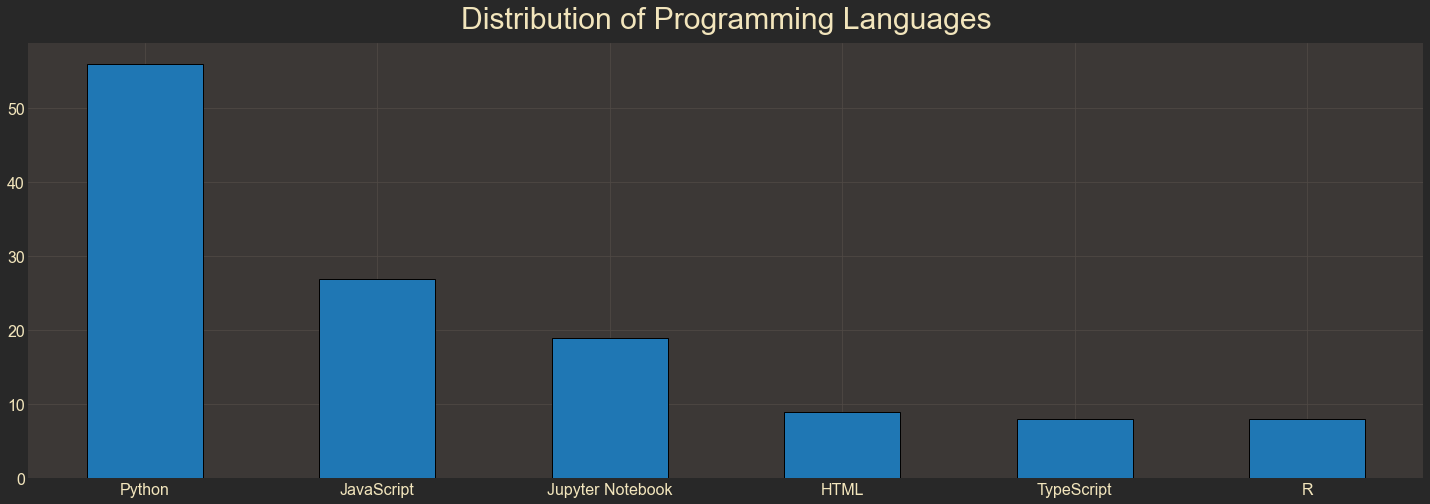

In [5]:
# view distribution of target
print(y_train.programming_language.value_counts())
# plot distribution of target
y_train.programming_language.value_counts().plot.bar(ec='k', )
plt.title('Distribution of Programming Languages', fontsize=30, pad=15)
plt.xticks(rotation=0, ha='center')
plt.show()

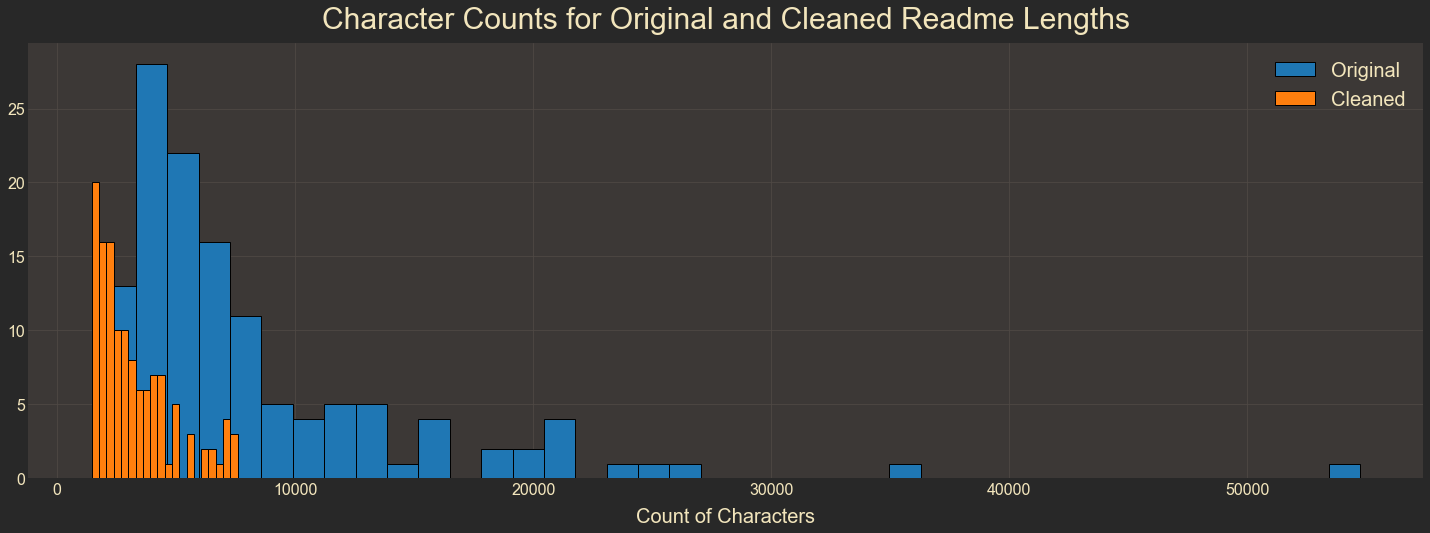

In [6]:
# plot distribution of clean and original character lengths
fig, ax = plt.subplots()
X_train.original_char_length.hist(ax=ax, bins=40, ec='k', label='Original')
X_train.cleaned_char_length.hist(ax=ax, bins=20, ec='k', label='Cleaned')
plt.title('Character Counts for Original and Cleaned Readme Lengths',
          fontsize=30, pad=15)
plt.xlabel('Count of Characters', fontsize=20, labelpad=10)
plt.legend(fontsize=20)
plt.show()

#### Individual Word Frequencies

In [7]:
# create series of top 20 words across all languages
top_20_words = pd.Series(' '.join(X_train.lemmatized_readme)\
                         .replace('\'', '').split()).value_counts()\
                         .sort_values(ascending=False).head(20)

In [8]:
# create series of words for each proggramming language
py_words = pd.Series(' '.join(X_train[y_train.programming_language == 'Python']\
                           .lemmatized_readme).replace('\'', '').split())
js_words = pd.Series(' '.join(X_train[y_train.programming_language == 'JavaScript']\
                           .lemmatized_readme).replace('\'', '').split())
jup_words = pd.Series(' '.join(X_train[y_train.programming_language == 'Jupyter Notebook']\
                           .lemmatized_readme).replace('\'', '').split())
html_words = pd.Series(' '.join(X_train[y_train.programming_language == 'HTML']\
                           .lemmatized_readme).replace('\'', '').split())
r_words = pd.Series(' '.join(X_train[y_train.programming_language == 'R']\
                           .lemmatized_readme).replace('\'', '').split())
ts_words = pd.Series(' '.join(X_train[y_train.programming_language == 'TypeScript']\
                           .lemmatized_readme).replace('\'', '').split())

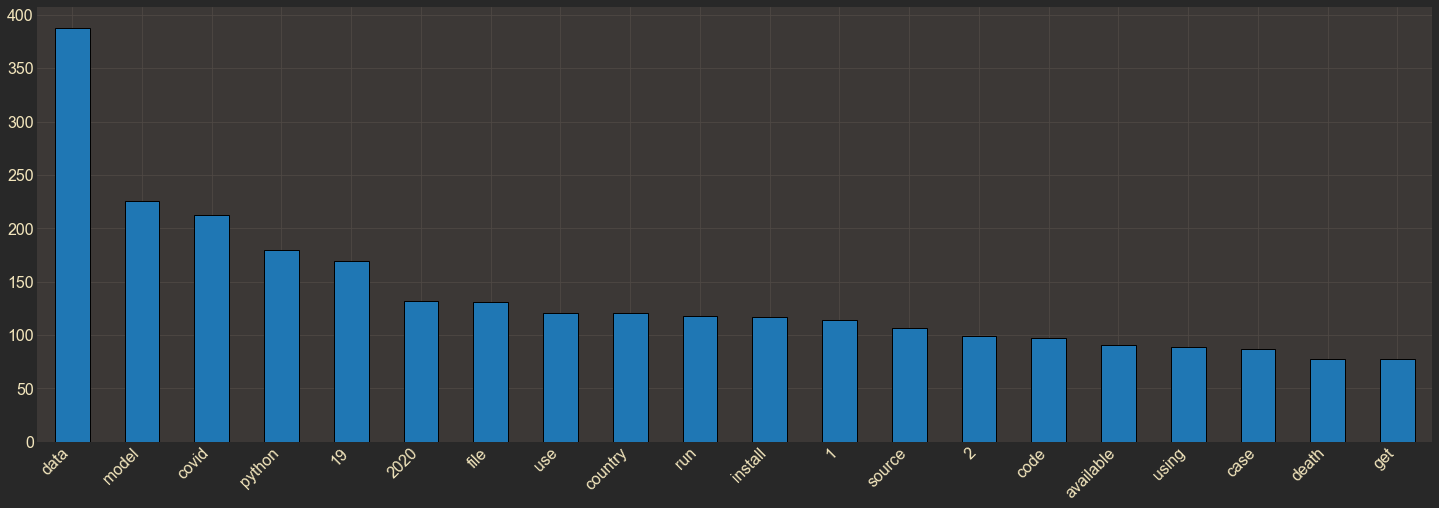

In [9]:
# visualize top 20 common words in Python
py_words.value_counts().sort_values(ascending=False).head(20).plot.bar(ec='k')
plt.xticks(rotation=45, ha='right')
plt.show()

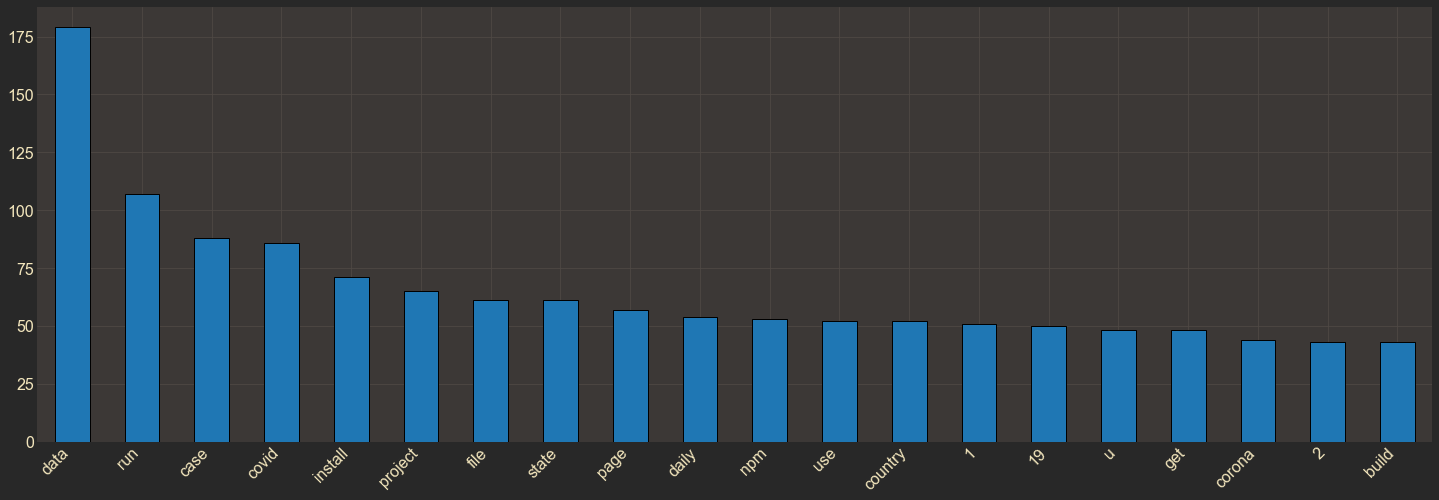

In [10]:
# visualize top 20 common words in JavaScript
js_words.value_counts().sort_values(ascending=False).head(20).plot.bar(ec='k')
plt.xticks(rotation=45, ha='right')
plt.show()

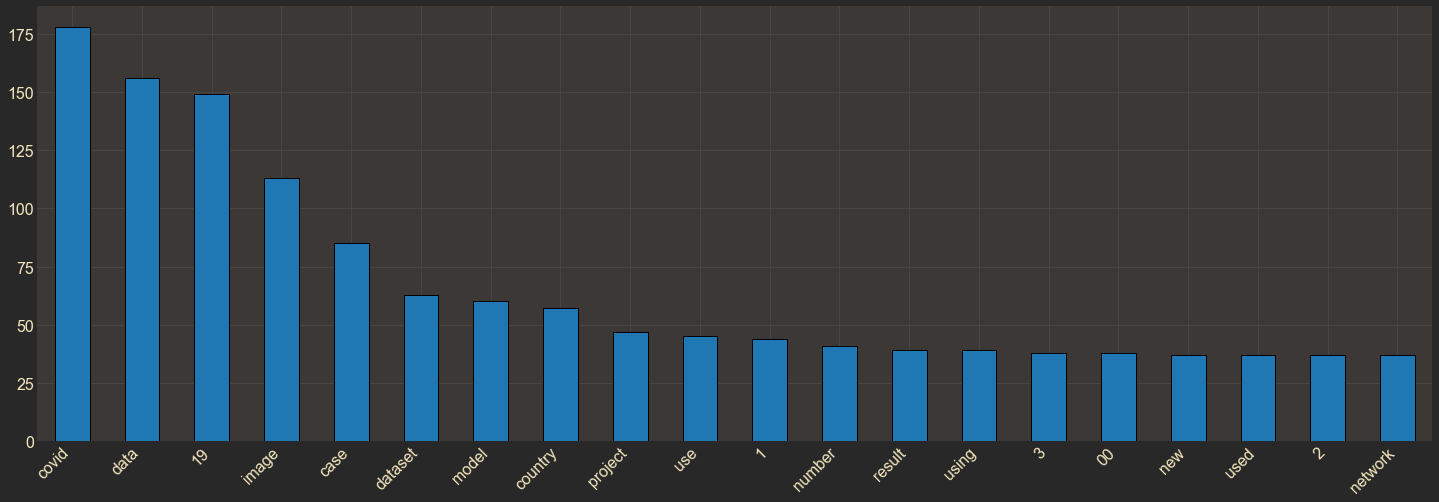

In [11]:
# visualize top 20 common words in Jupyter
jup_words.value_counts().sort_values(ascending=False).head(20).plot.bar(ec='k')
plt.xticks(rotation=45, ha='right')
plt.show()

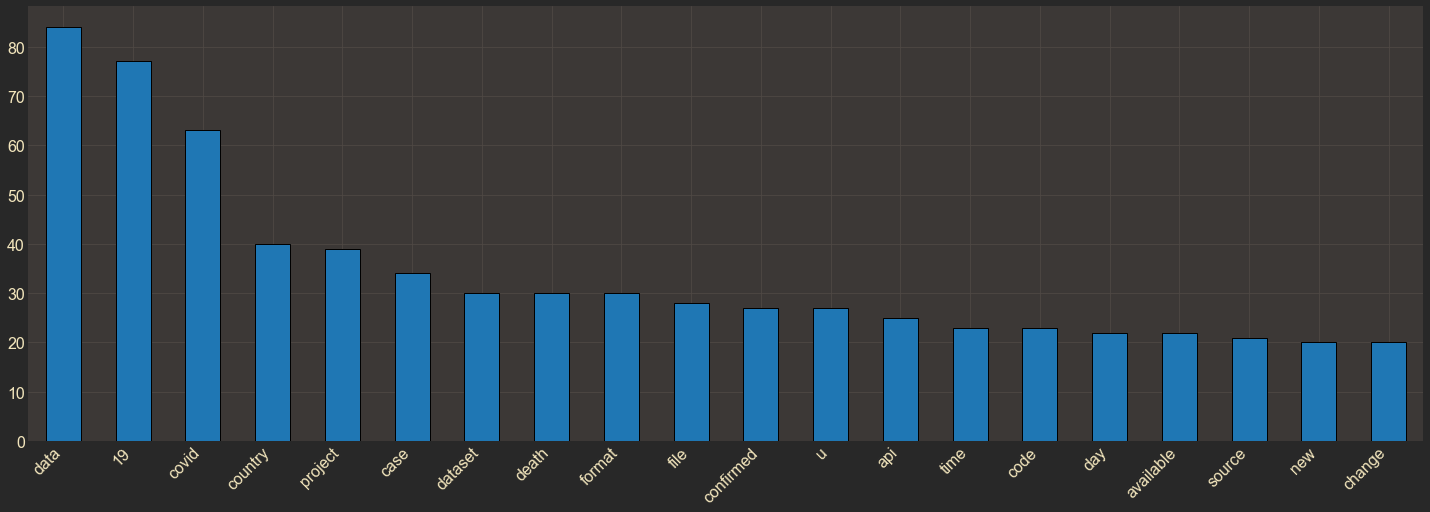

In [12]:
# visualize top 20 common words in HTML
html_words.value_counts().sort_values(ascending=False).head(20).plot.bar(ec='k')
plt.xticks(rotation=45, ha='right')
plt.show()

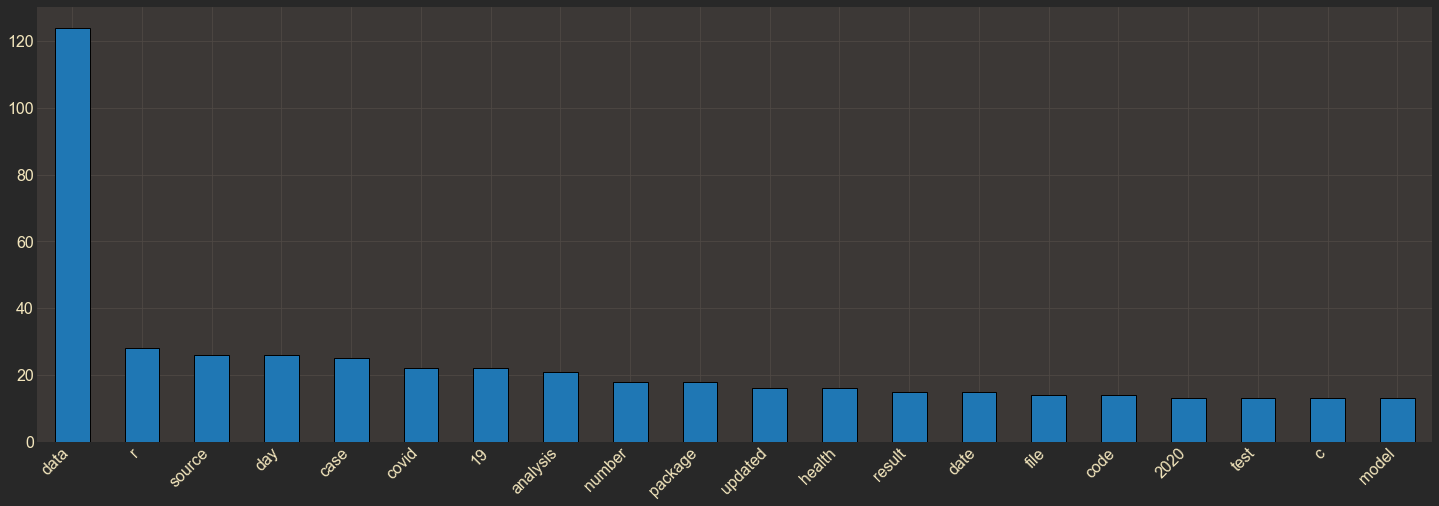

In [13]:
# visualize top 20 common words in R
r_words.value_counts().sort_values(ascending=False).head(20).plot.bar(ec='k')
plt.xticks(rotation=45, ha='right')
plt.show()

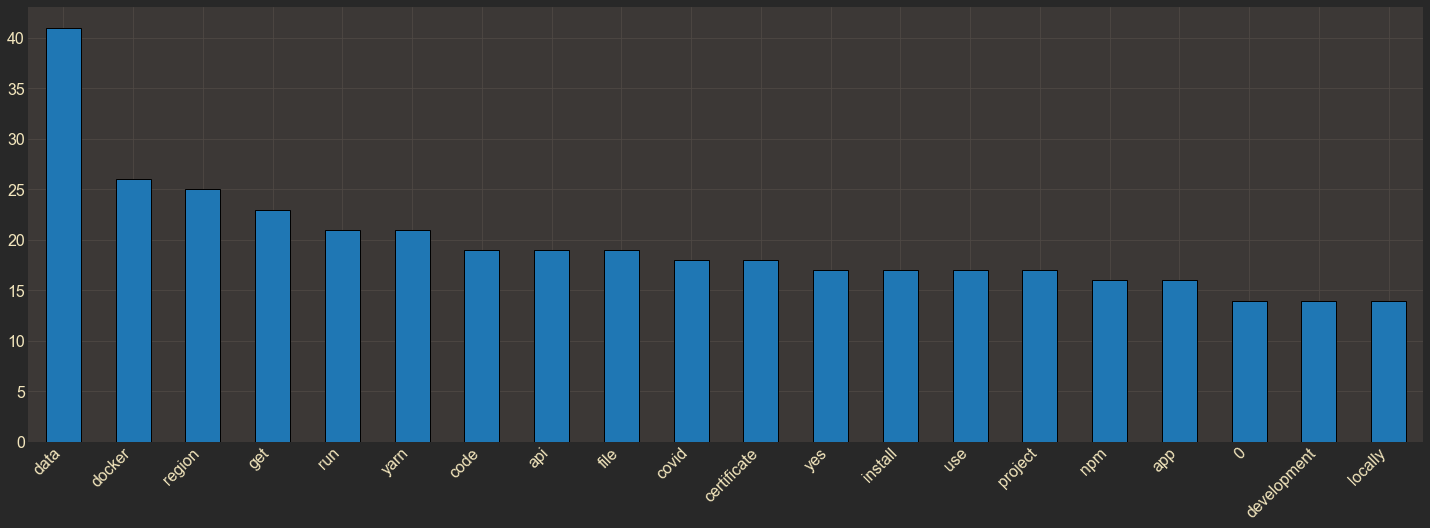

In [14]:
# visualize top 20 common words in TypeScript
ts_words.value_counts().sort_values(ascending=False).head(20).plot.bar(ec='k')
plt.xticks(rotation=45, ha='right')
plt.show()

In [15]:
# view which languages do not contain a top 20 word at all
len(top_20_words[top_20_words.index.isin(py_words)]),\
len(top_20_words[top_20_words.index.isin(js_words)]),\
len(top_20_words[top_20_words.index.isin(jup_words)]),\
len(top_20_words[top_20_words.index.isin(html_words)]),\
len(top_20_words[top_20_words.index.isin(r_words)]),\
len(top_20_words[top_20_words.index.isin(ts_words)])

(20, 20, 20, 20, 18, 18)

In [16]:
# view which do not contain a top 20 in respective top 20
len(top_20_words[top_20_words.index.isin(py_words.value_counts()\
                             .sort_values().tail(20).index)]),\
len(top_20_words[top_20_words.index.isin(js_words.value_counts()\
                             .sort_values().tail(20).index)]),\
len(top_20_words[top_20_words.index.isin(jup_words.value_counts()\
                             .sort_values().tail(20).index)]),\
len(top_20_words[top_20_words.index.isin(html_words.value_counts()\
                             .sort_values().tail(20).index)]),\
len(top_20_words[top_20_words.index.isin(r_words.value_counts()\
                             .sort_values().tail(20).index)]),\
len(top_20_words[top_20_words.index.isin(ts_words.value_counts()\
                             .sort_values().tail(20).index)])

(18, 12, 12, 10, 9, 8)

#### Takeaways

Viewing the single word frequency for both the sum of and individual languages does not provide a particularly strong insight into using natural language to determine the programming language for the repository contents. The majority, if not all, of the top $20$ most frequent words are present in the `readme` contents for all languages, and the top $20$ compared with individual languages respective top $20$ trends down with less common target classes. There may be something there, but the preceding fact casts doubt on a definitive takeaway.

#### Bi-gram Frequencies